In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

file_path = 'github_daily_trending.csv'
df = pd.read_csv(file_path)

df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [3]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_name           4120 non-null   object 
 1   repo_name          4120 non-null   object 
 2   repo_url           4120 non-null   object 
 3   description        4120 non-null   object 
 4   language           4094 non-null   object 
 5   star               3964 non-null   float64
 6   forks              3964 non-null   float64
 7   daily_star         4120 non-null   int64  
 8   date               4120 non-null   object 
 9   trending_category  4120 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 322.0+ KB


org_name               0
repo_name              0
repo_url               0
description            0
language              26
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

df['language'].fillna('Unknown', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   org_name           4120 non-null   object        
 1   repo_name          4120 non-null   object        
 2   repo_url           4120 non-null   object        
 3   description        4120 non-null   object        
 4   language           4120 non-null   object        
 5   star               3964 non-null   float64       
 6   forks              3964 non-null   float64       
 7   daily_star         4120 non-null   int64         
 8   date               4120 non-null   datetime64[ns]
 9   trending_category  4120 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 322.0+ KB


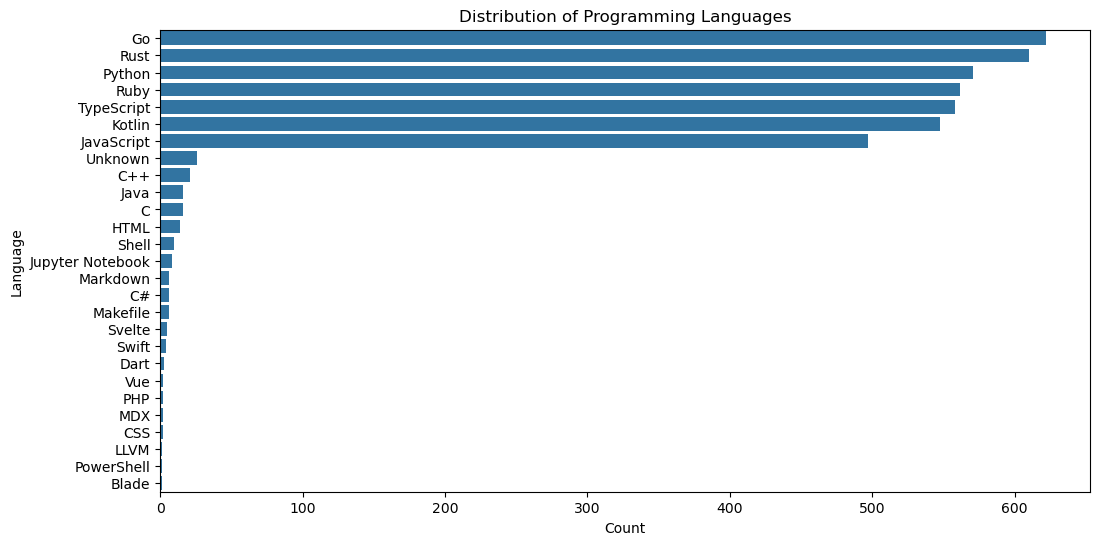

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y='language', data=df, order=df['language'].value_counts().index)
plt.title('Distribution of Programming Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

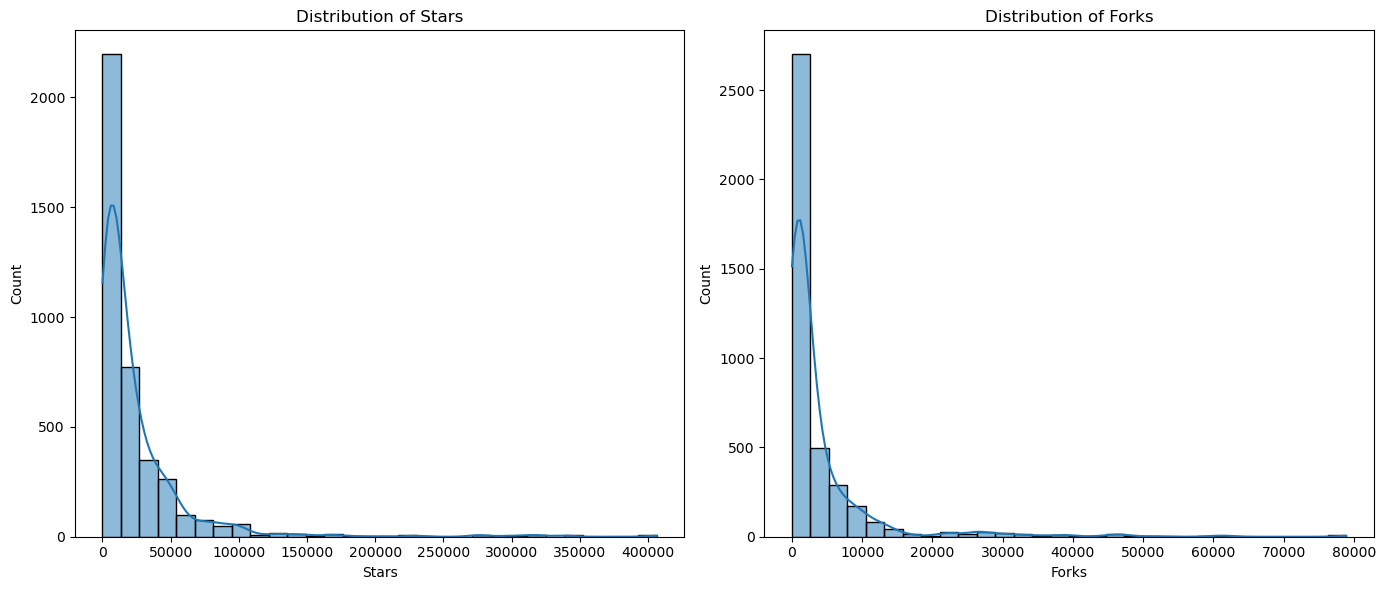

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['star'].dropna(), bins=30, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')

plt.subplot(1, 2, 2)
sns.histplot(df['forks'].dropna(), bins=30, kde=True)
plt.title('Distribution of Forks')
plt.xlabel('Forks')

plt.tight_layout()
plt.show()

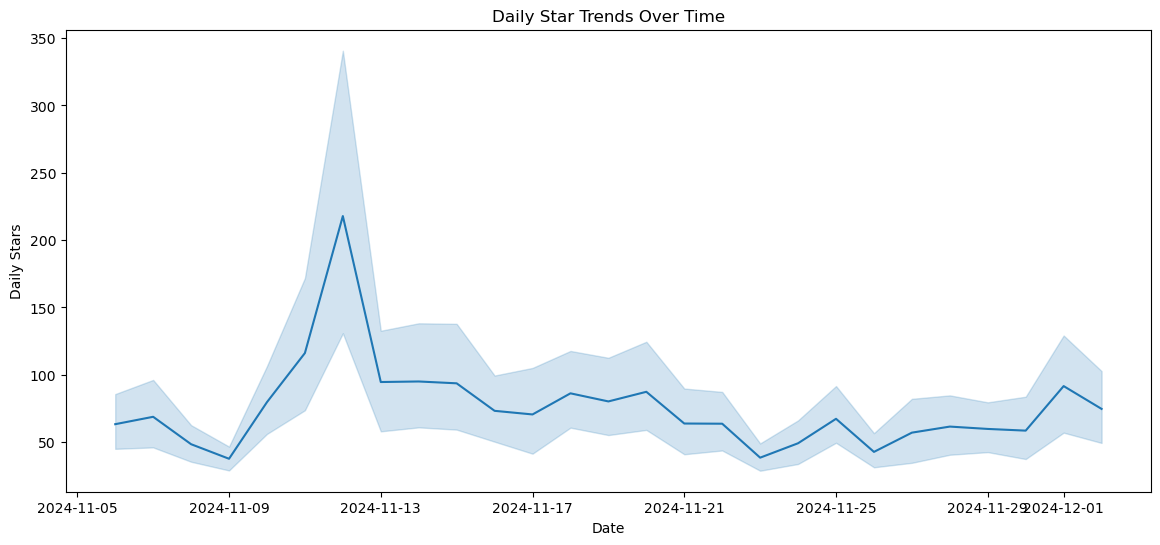

In [13]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='daily_star', data=df)
plt.title('Daily Star Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Stars')
plt.show()

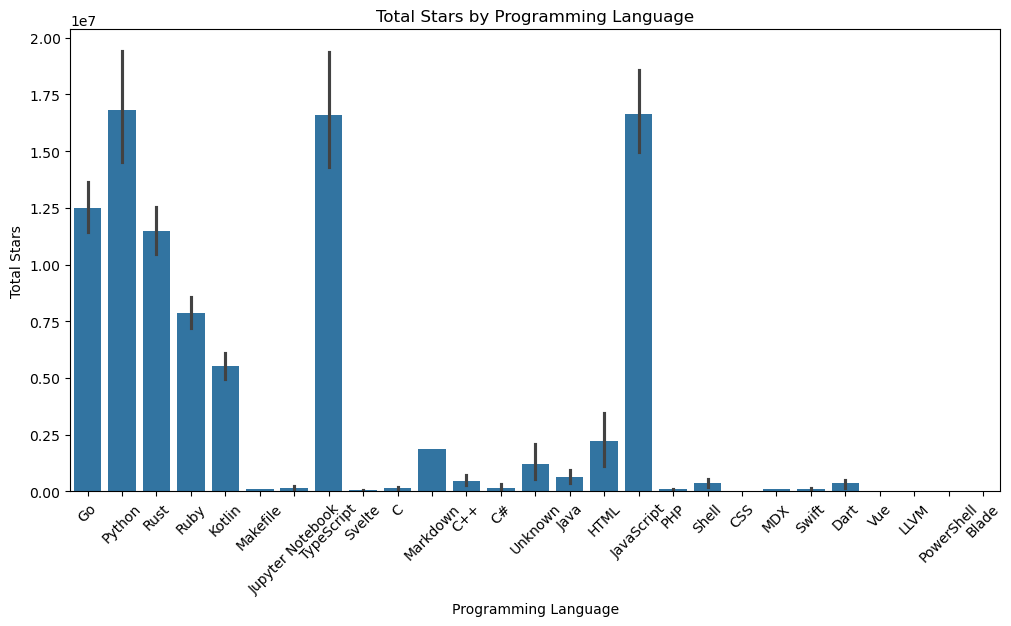

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='language', y='star', estimator=sum)
plt.title('Total Stars by Programming Language')
plt.xticks(rotation=45)
plt.ylabel('Total Stars')
plt.xlabel('Programming Language')
plt.show()

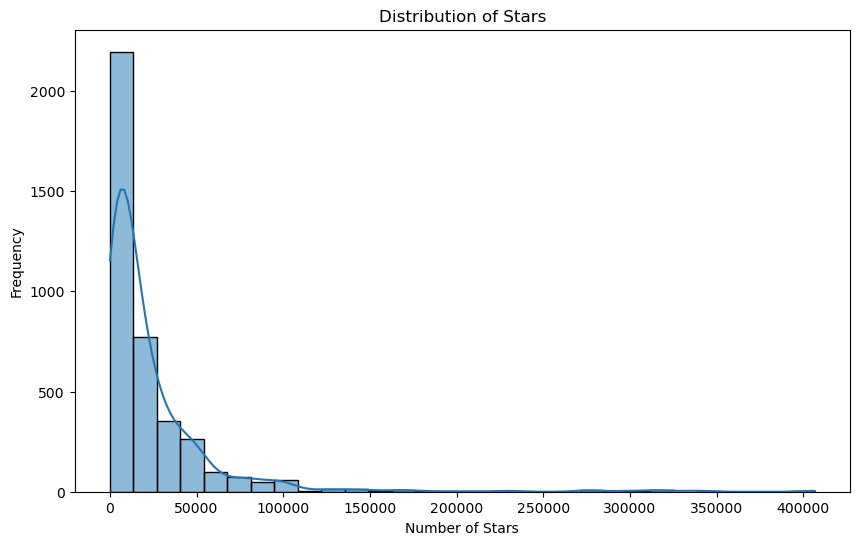

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['star'].dropna(), bins=30, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Number of Stars')
plt.ylabel('Frequency')
plt.show()

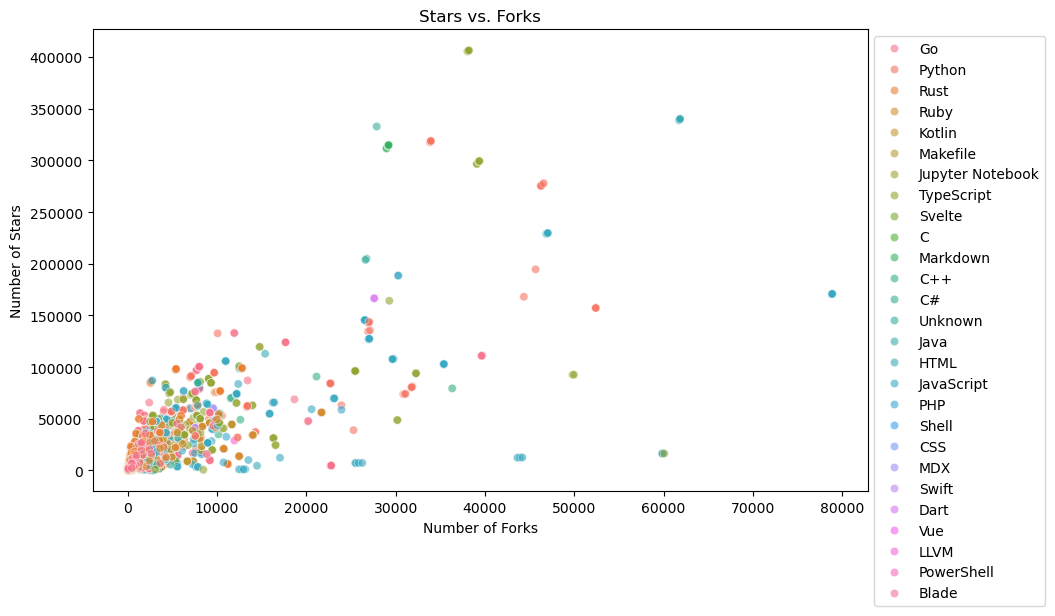

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='forks', y='star', hue='language', alpha=0.6)
plt.title('Stars vs. Forks')
plt.xlabel('Number of Forks')
plt.ylabel('Number of Stars')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

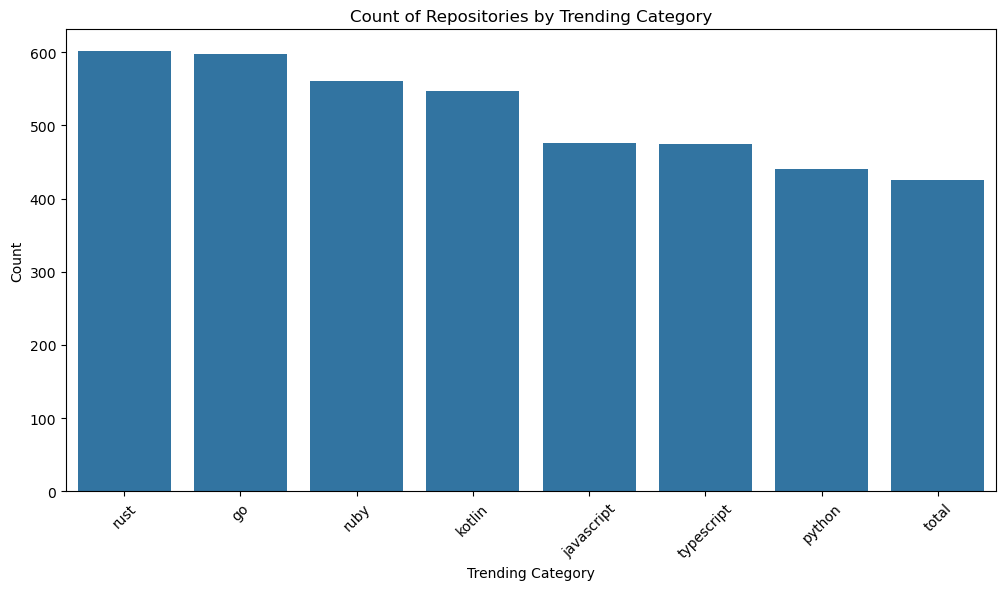

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='trending_category', order=df['trending_category'].value_counts().index)
plt.title('Count of Repositories by Trending Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Trending Category')
plt.show()

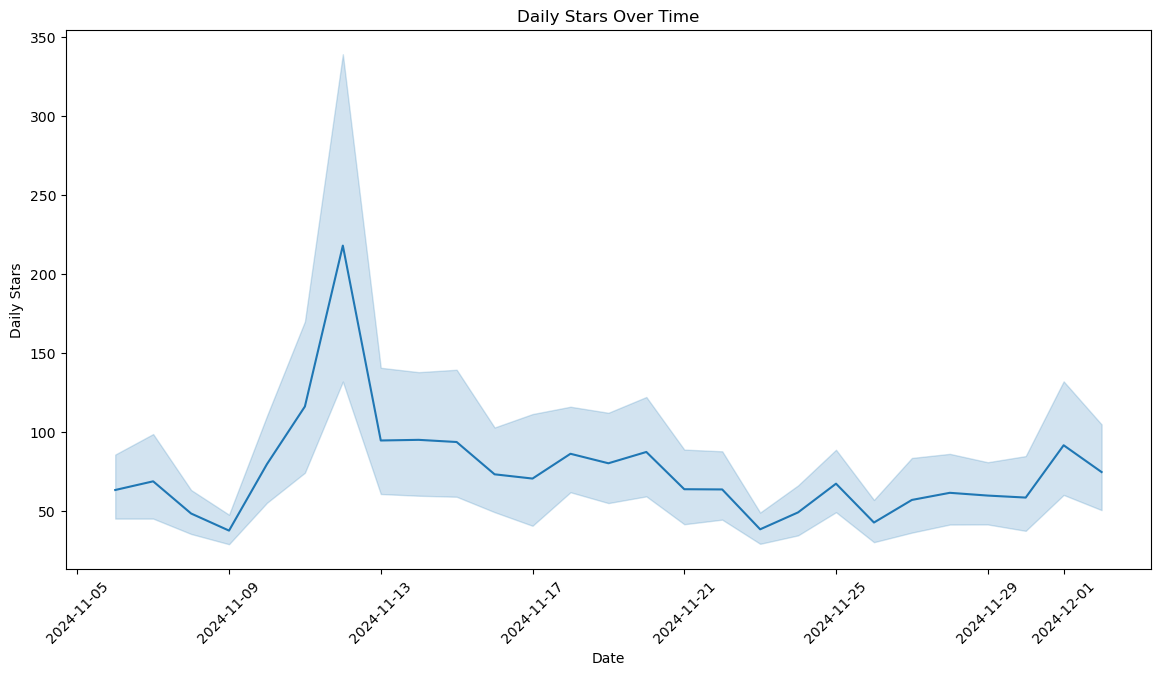

In [23]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='daily_star')
plt.title('Daily Stars Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Stars')
plt.xticks(rotation=45)
plt.show()

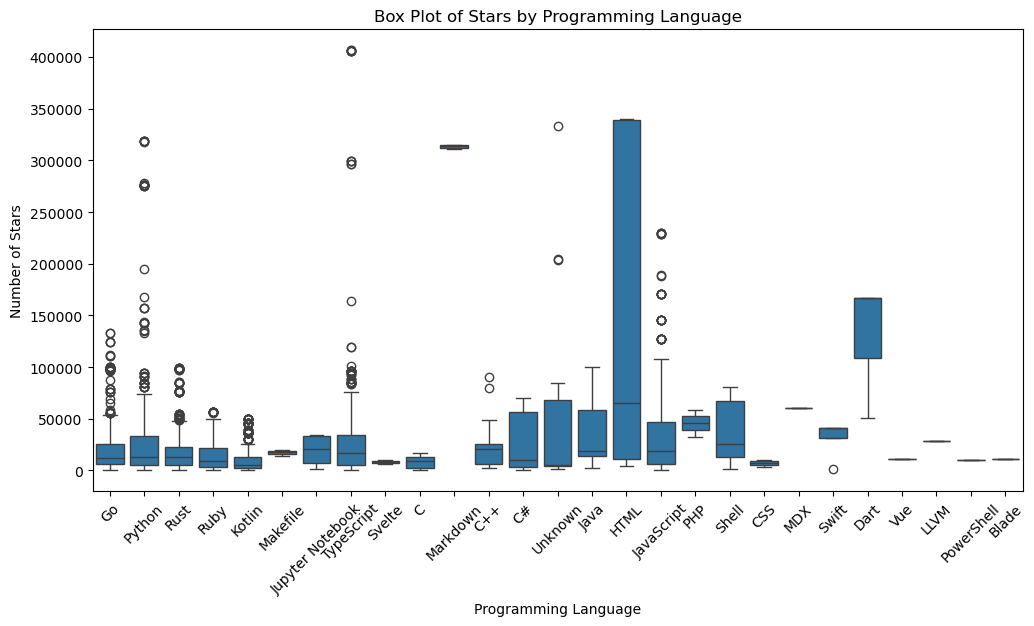

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='language', y='star')
plt.title('Box Plot of Stars by Programming Language')
plt.xticks(rotation=45)
plt.ylabel('Number of Stars')
plt.xlabel('Programming Language')
plt.show()

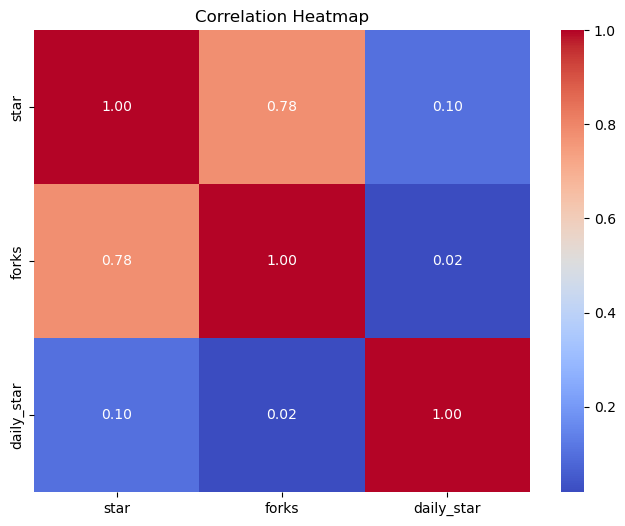

In [27]:
correlation_matrix = df[['star', 'forks', 'daily_star']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

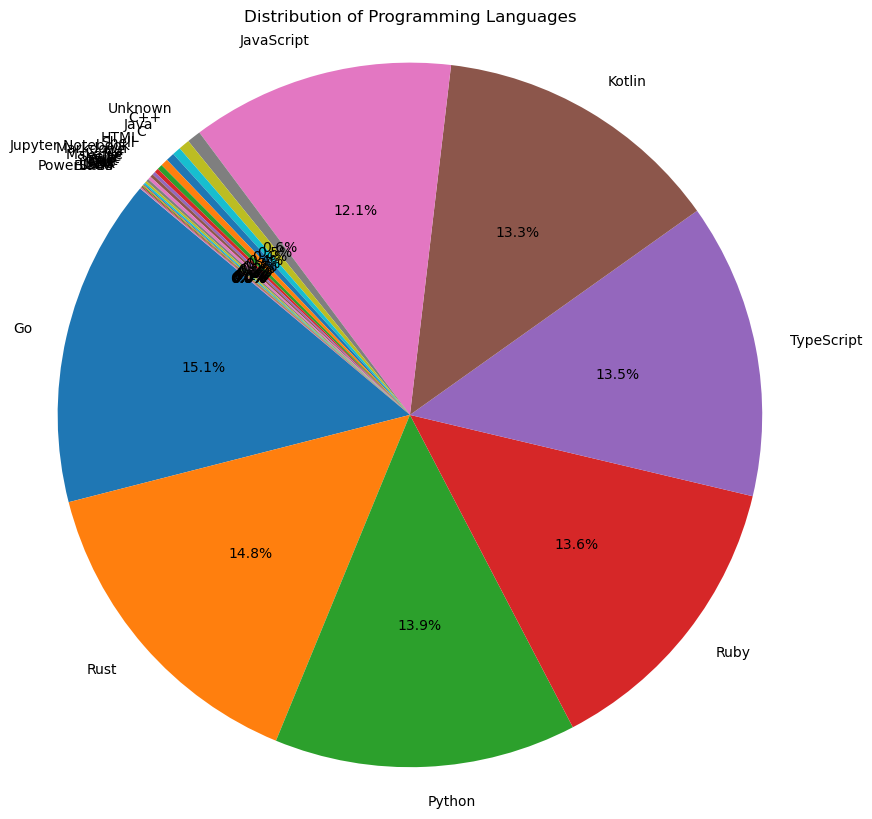

In [29]:
language_counts = df['language'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Programming Languages')
plt.axis('equal')  
plt.show()

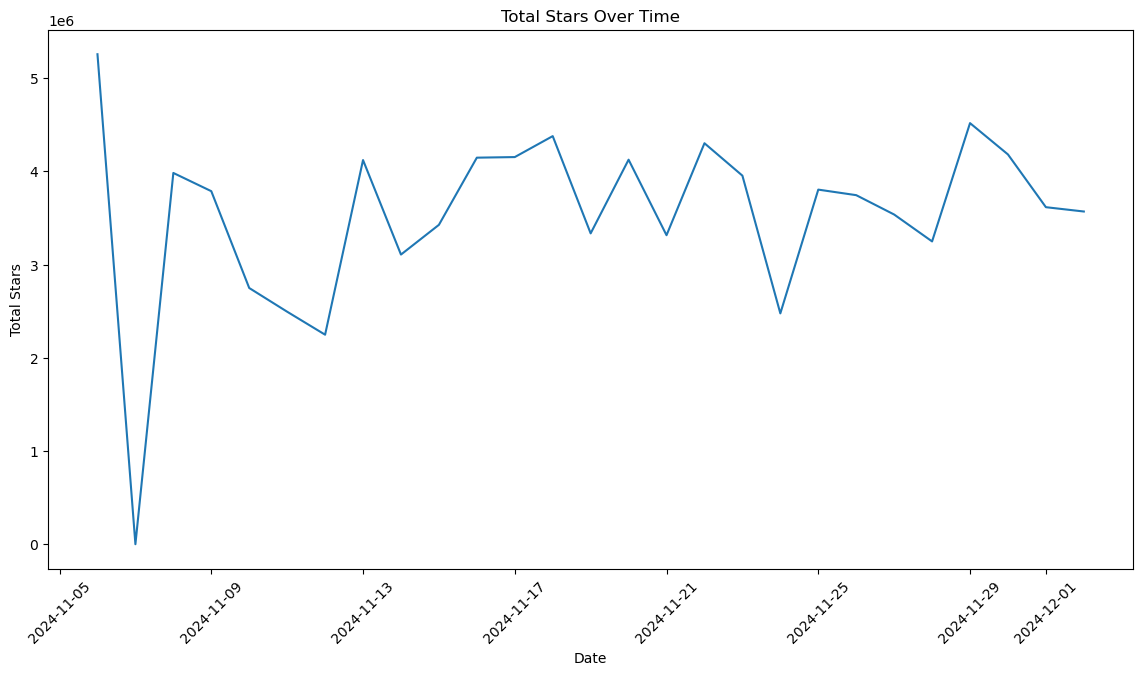

In [31]:
daily_stars = df.groupby('date')['star'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_stars, x='date', y='star')
plt.title('Total Stars Over Time')
plt.xlabel('Date')
plt.ylabel('Total Stars')
plt.xticks(rotation=45)
plt.show()

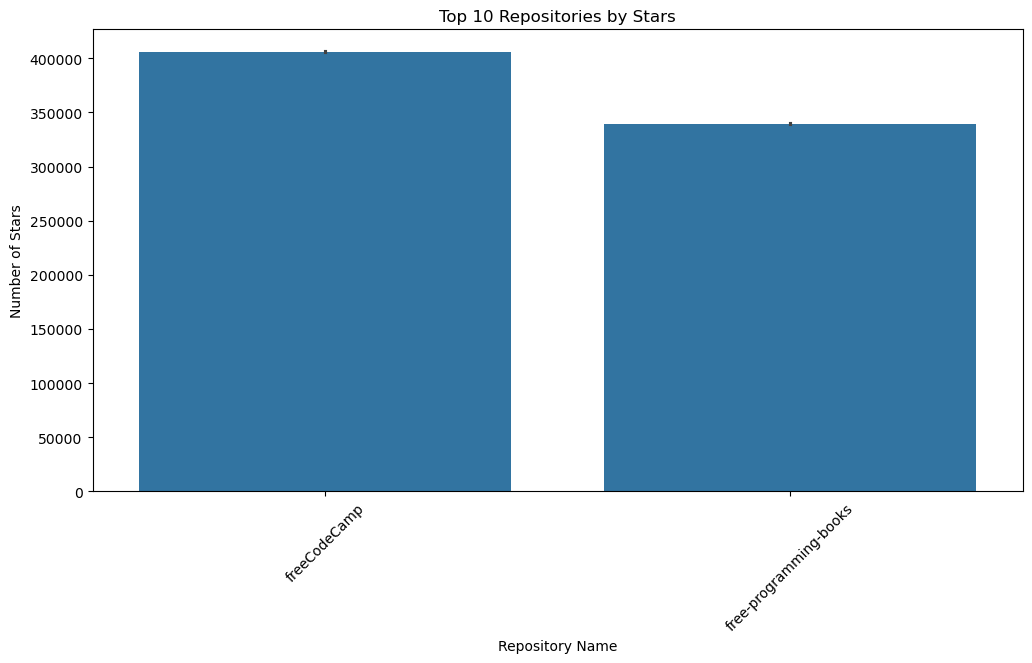

In [33]:
top_repos = df.nlargest(10, 'star')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_repos, x='repo_name', y='star')
plt.title('Top 10 Repositories by Stars')
plt.xticks(rotation=45)
plt.ylabel('Number of Stars')
plt.xlabel('Repository Name')
plt.show()

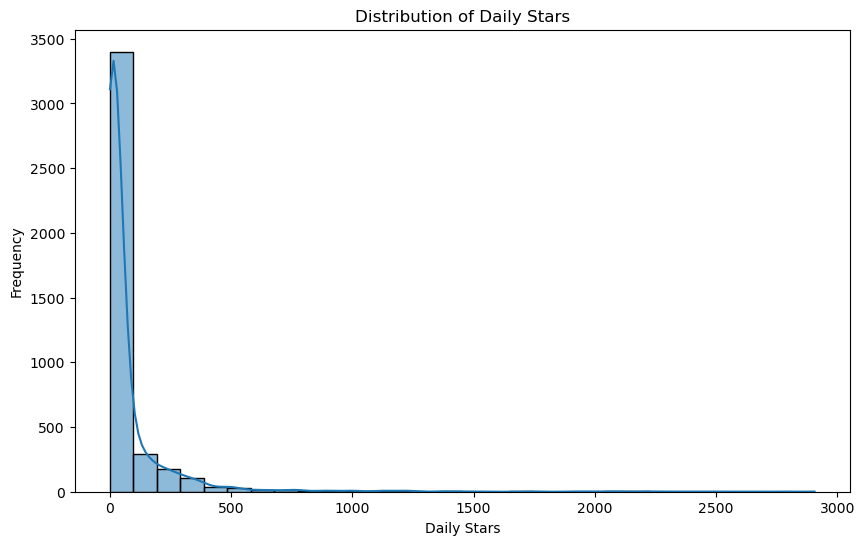

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['daily_star'], bins=30, kde=True)
plt.title('Distribution of Daily Stars')
plt.xlabel('Daily Stars')
plt.ylabel('Frequency')
plt.show()

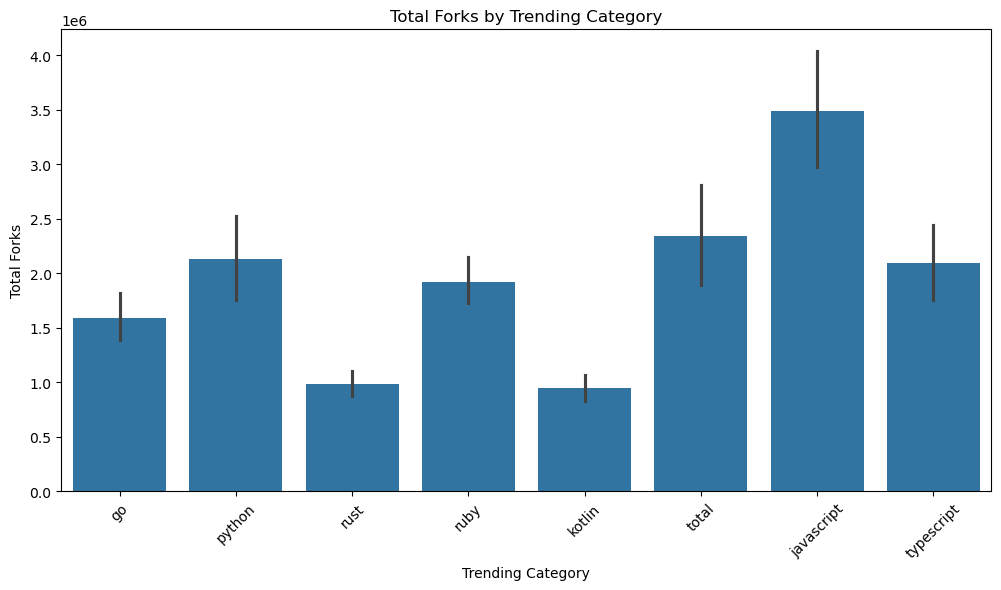

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='trending_category', y='forks', estimator=sum)
plt.title('Total Forks by Trending Category')
plt.xticks(rotation=45)
plt.ylabel('Total Forks')
plt.xlabel('Trending Category')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = ['star', 'forks']
X = df[features].fillna(0)
y = df['daily_star']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

153.2095668033802

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['star', 'forks']
X = df[features].fillna(0) 
y = df['daily_star']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 201.99190303597882


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

features = ['star', 'forks']
X = df[features].fillna(0)  

y = (df['daily_star'] > 100).astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8507281553398058
Confusion Matrix:
[[697   2]
 [121   4]]


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

features = ['star', 'forks']
X = df[features].fillna(0)
y = df['daily_star']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Root Mean Squared Error: 153.2095668033802
Mean Absolute Error: 58.9627959338126
R-squared: 0.4305971066500395


In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df['star_forks_interaction'] = df['star'] * df['forks']

features = ['star', 'forks', 'star_forks_interaction']  
X = df[features].fillna(0)
y = df['daily_star']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', RandomForestRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Cross-validation scores
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')

Best Parameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Root Mean Squared Error: 137.67816371979293
Mean Absolute Error: 54.83819810923967
R-squared: 0.54019040423567
Cross-validated RMSE: 149.72027173060567 ± 56.012589338133125


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

features = ['star', 'forks']
X = df[features].fillna(0) 
y = df['daily_star']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 176.4366251080405
